## Import libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the data

In [2]:
df = pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## EDA

Simple pairplot for this small dataset

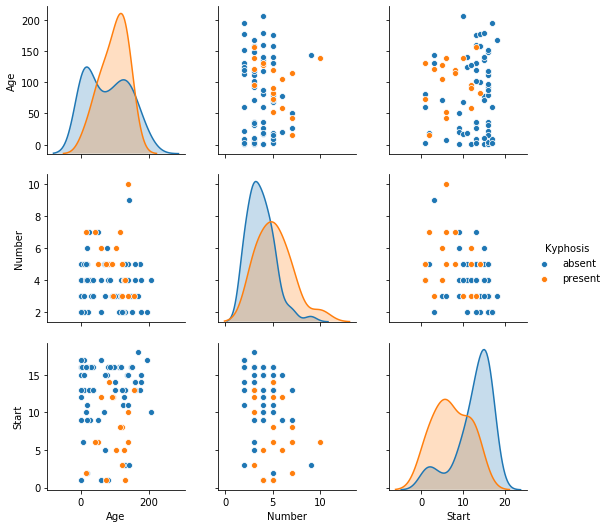

In [3]:
sns.pairplot(df,hue='Kyphosis')

## Train and Test data split

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [6]:
X_train, X_test, y_train, y_test   = train_test_split(X,y,test_size=0.30)

## Decision tree

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
dtree = DecisionTreeClassifier(criterion = 'entropy')

In [9]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [10]:
predictions = dtree.predict(X_test)

In [11]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [13]:
conf_matrix=confusion_matrix(y_test,predictions)
accuracy=accuracy_score(y_test,predictions)

In [14]:
conf_matrix,accuracy

(array([[13,  3],
        [ 5,  4]], dtype=int64), 0.68)

In [15]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.72      0.81      0.76        16
     present       0.57      0.44      0.50         9

    accuracy                           0.68        25
   macro avg       0.65      0.63      0.63        25
weighted avg       0.67      0.68      0.67        25



In [16]:
print(confusion_matrix(y_test,predictions))

[[13  3]
 [ 5  4]]


## Tree Visualization

Scikit learn has built-in visualization capabilities for decision tree. Install pydot library to work

In [18]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

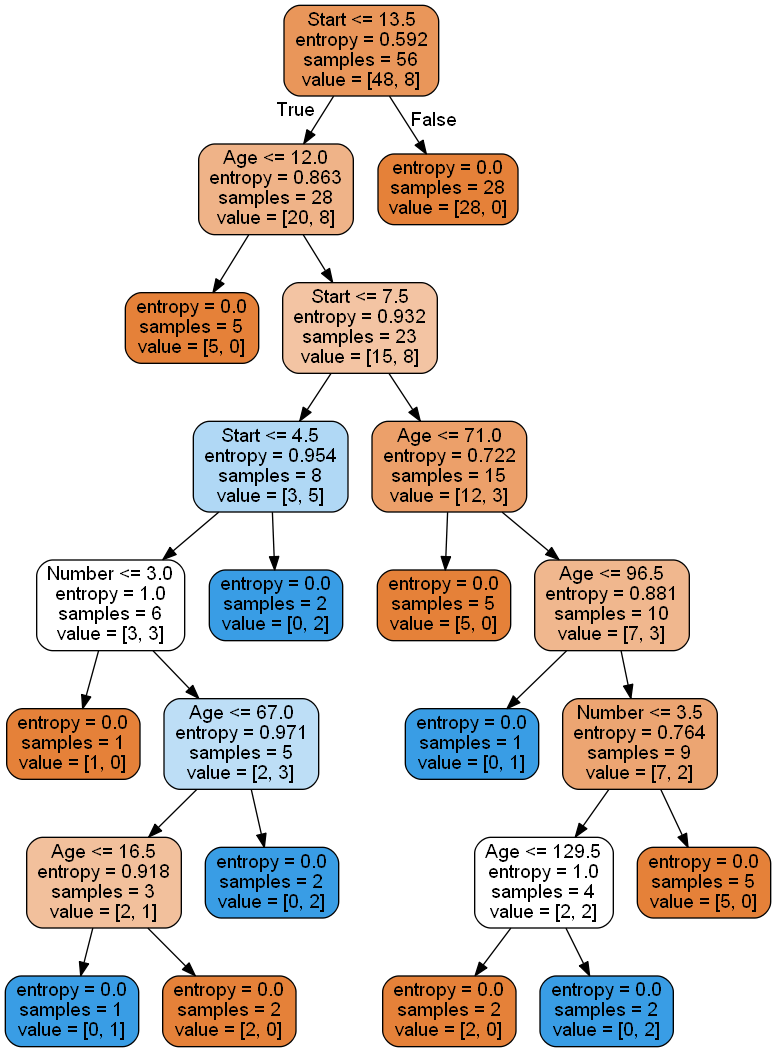

In [20]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())